In [31]:
import pandas as pd
from src import *
import numpy as np
import timeit
import xgboost as xgb

sizes = [10000, 25000, 50000, 75000, 100000, 250000, 500000, 750000, 1000000, 2500000, 5000000, 7500000, 10000000]
times = np.zeros((len(sizes), 5))

linspace = DataBinner(method = 'linspace', n_bins = 255)
quantile = DataBinner(method = 'quantile', n_bins = 255)
kmeans_plus = DataBinner(method = 'kmeans', n_bins = 255, kmean_init='++')
kmeans_quantile = DataBinner(method = 'kmeans', n_bins = 255, kmean_init='quantile')
minibatch_kmeans = DataBinner(method = 'minibatch_kmeans', n_bins = 255)


for i, size in enumerate(sizes):
    print(f"Size: {size}")
    X = np.random.uniform(0, 1, size)
    X = pd.DataFrame(data = X, columns = ['feature'])
    times[i, 0] = timeit.timeit(lambda: linspace.fit_transform(X), number=1)
    times[i, 1] = timeit.timeit(lambda: quantile.fit_transform(X), number=1)
    times[i, 2] = timeit.timeit(lambda: kmeans_plus.fit_transform(X), number=1)
    times[i, 3] = timeit.timeit(lambda: kmeans_quantile.fit_transform(X), number=1)
    times[i, 4] = timeit.timeit(lambda: minibatch_kmeans.fit_transform(X), number=1)


Size: 10000
Size: 25000
Size: 50000
Size: 75000
Size: 100000
Size: 250000
Size: 500000
Size: 750000


KeyboardInterrupt: 

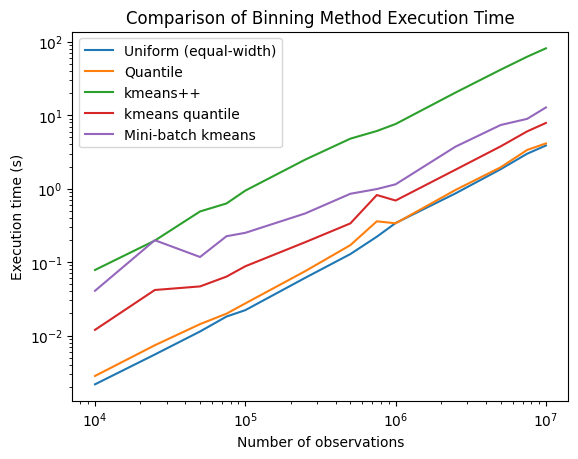

In [30]:
import matplotlib.pyplot as plt

plt.plot(sizes, times[:, 0], label='Uniform (equal-width)')
plt.plot(sizes, times[:, 1], label='Quantile')
plt.plot(sizes, times[:, 2], label='kmeans++')
plt.plot(sizes, times[:, 3], label='kmeans quantile')
plt.plot(sizes, times[:, 4], label='Mini-batch kmeans')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title("Comparison of Binning Method Execution Time")
plt.title("Comparison of Binning Method Execution Time")
plt.xlabel("Number of observations")
plt.ylabel("Execution time (s)")
plt.savefig('timing_log.png')

In [25]:
time_ratio = times[:, 3] / times[:, 1]
print(times[-1, 3], times[-1, 1])

7.597880667075515 4.3413883340545
